Voy a ver qué me salió al correr esmeralda comparado con lo que ya había procesado Marija. Luego corro beersheba en ambos y comparo también

In [25]:
import tables  as tb
import pandas  as pd
import sqlite3 as sql
import numpy   as np

import matplotlib.pyplot    as plt
import matplotlib           as mpl
from   mpl_toolkits.mplot3d import Axes3D

from invisible_cities.io import mcinfo_io as mio
from invisible_cities.io import dst_io    as dio

from next_sparseconvnet.data_io_scripts.plotting_utils import plot_3d_hits

Primero miramos el fichero original de donde salieron los datos...

In [26]:
dir_penth = '/Users/mperez/NEXT/bersh_prod/prod_example/Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.dst_6206.root.h5'

In [27]:
with tb.open_file(dir_penth) as h5in:
    print(h5in)

/Users/mperez/NEXT/bersh_prod/prod_example/Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.dst_6206.root.h5 (File) ''
Last modif.: 'Fri Oct  1 11:27:34 2021'
Object Tree: 
/ (RootGroup) ''
/DST (Group) ''
/DST/Events (Table(808,), shuffle, zlib(4)) 'KDST Events'
/Filters (Group) ''
/Filters/s12_selector (Table(545,), shuffle, zlib(4)) 'Event has passed filter flag'
/MC (Group) ''
/MC/extents (Table(545,), shuffle, zlib(4)) 'extents'
/MC/generators (Table(0,), shuffle, zlib(4)) 'generators'
/MC/hits (Table(136630,), shuffle, zlib(4)) 'hits'
/MC/particles (Table(16461,), shuffle, zlib(4)) 'particles'
/RECO (Group) ''
/RECO/Events (Table(264688,), shuffle, zlib(4)) 'Hits'
/Run (Group) ''
/Run/events (Table(545,), shuffle, zlib(4)) 'event info table'
/Run/runInfo (Table(545,), shuffle, zlib(4)) 'run info table'



Información de MC

In [28]:
df_hits_MC = mio.load_mchits_df(dir_penth)
df_part_MC = mio.load_mcparticles_df(dir_penth)

Información de penthesilea (hits)

In [29]:
df_hits_penth = dio.load_dst(dir_penth, 'RECO', 'Events')

Escogemos un evento para mirar como furrula la cosa

In [30]:
nevent = 80

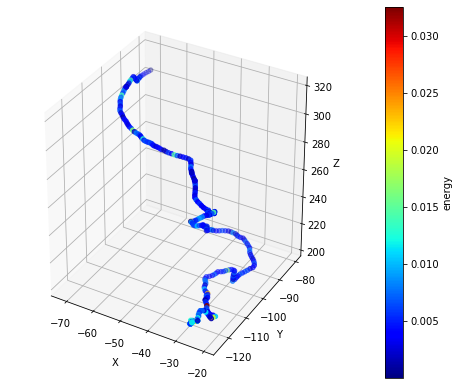

In [31]:
df_hits_MC_event = df_hits_MC.loc[nevent]
plot_3d_hits(df_hits_MC_event)

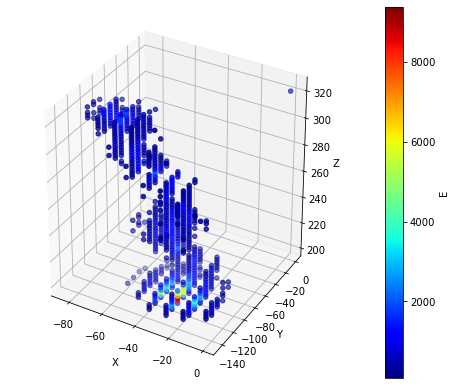

In [8]:
df_hits_penth_event = df_hits_penth.loc[df_hits_penth['event'] == nevent]

plot_3d_hits(df_hits_penth_event, value = 'E', coords = ['X', 'Y', 'Z'])

SI ESO AÑADIR FUNCIONES DE PLOTEADO NUEVAS O A SCN O A ESTE REPOSITORIO... (adaptarla a que dé opción de plotear una cosa solo ou duas!!)

In [9]:
def plot_3d_hits_double(hits, hits2, value='energy', coords = ['x', 'y', 'z'], cmap = mpl.cm.jet, value2 = 'E', coords2 = ['X', 'Y', 'Z'], opacity = 0.1):
    #Función para hacer plot de distintos hits de un mismo evento superponiéndose
    
    fig  = plt.figure(figsize=(15, 15), frameon=False)
    gs   = fig.add_gridspec(2, 40)
    ax   = fig.add_subplot(gs[0, 0:16], projection = '3d')
    axcb = fig.add_subplot(gs[0, 18])
    norm = mpl.colors.Normalize(vmin=hits.loc[:, value].min(), vmax=hits.loc[:, value].max())

    m    = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

    colors = np.asarray(np.vectorize(m.to_rgba)(hits.loc[:, value]))
    colors = np.rollaxis(colors, 0, 2)

    ax.scatter(hits[coords[0]], hits[coords[1]], hits[coords[2]], c=colors, marker='o')
    cb = mpl.colorbar.ColorbarBase(axcb, cmap=cmap, norm=norm, orientation='vertical')

    #axcb2 = fig.add_subplot(gs[0, 18])
    norm2 = mpl.colors.Normalize(vmin=hits2.loc[:, value2].min(), vmax=hits2.loc[:, value2].max())

    m2    = mpl.cm.ScalarMappable(norm=norm2, cmap=cmap)

    colors2 = np.asarray(np.vectorize(m2.to_rgba)(hits2.loc[:, value2]))
    colors2 = np.rollaxis(colors2, 0, 2)

    ax.scatter(hits2[coords2[0]], hits2[coords2[1]], hits2[coords2[2]], c=colors2, marker='o', alpha = opacity)
    #cb2 = mpl.colorbar.ColorbarBase(axcb2, cmap=cmap, norm=norm2, orientation='vertical')
    
    ax.set_xlabel('X ')
    ax.set_ylabel('Y ')
    ax.set_zlabel('Z ')
    cb.set_label (value)

    plt.show()

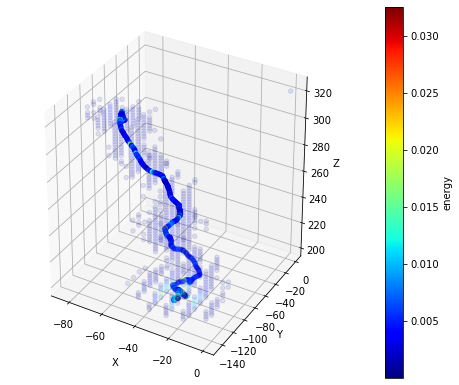

In [10]:
plot_3d_hits_double(df_hits_MC_event, df_hits_penth_event)

Ahora veamos el esmeralda de Marija 

In [11]:
dir_esm = '/Users/mperez/NEXT/bersh_prod/prod_example/Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.cdst_6206.root.h5'

In [12]:
with tb.open_file(dir_esm) as h5in:
    print(h5in)

/Users/mperez/NEXT/bersh_prod/prod_example/Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.cdst_6206.root.h5 (File) ''
Last modif.: 'Sat Oct  2 19:23:50 2021'
Object Tree: 
/ (RootGroup) ''
/CHITS (Group) ''
/CHITS/highTh (Table(83259,), shuffle, zlib(4)) 'Hits'
/CHITS/lowTh (Table(263600,), shuffle, zlib(4)) 'Hits'
/DST (Group) ''
/DST/Events (Table(808,), shuffle, zlib(4)) 'KDST Events'
/Filters (Group) ''
/Filters/high_th_select (Table(545,), shuffle, zlib(4)) 'Event has passed filter flag'
/Filters/low_th_select (Table(545,), shuffle, zlib(4)) 'Event has passed filter flag'
/Filters/topology_select (Table(545,), shuffle, zlib(4)) 'Event has passed filter flag'
/MC (Group) ''
/MC/extents (Table(545,), shuffle, zlib(4)) 'extents'
/MC/generators (Table(0,), shuffle, zlib(4)) 'generators'
/MC/hits (Table(136630,), shuffle, zlib(4)) 'hits'
/MC/particles (Table(16461,), shuffle, zlib(4)) 'particles'
/Run (Group) ''
/Run/events (Table(545,), shuffle, zlib(4)) 'event info table'
/Run/runInfo (Table

In [13]:
dir_esm_ex = '/Users/mperez/NEXT/bersh_prod/prod_example/esmeralda_example.h5'

In [14]:
with tb.open_file(dir_esm_ex) as h5in:
    print(h5in)

/Users/mperez/NEXT/bersh_prod/prod_example/esmeralda_example.h5 (File) ''
Last modif.: 'Fri Oct  1 13:56:11 2021'
Object Tree: 
/ (RootGroup) ''
/CHITS (Group) ''
/CHITS/highTh (Table(83259,), shuffle, zlib(4)) 'Hits'
/CHITS/lowTh (Table(263600,), shuffle, zlib(4)) 'Hits'
/DST (Group) ''
/DST/Events (Table(808,), shuffle, zlib(4)) 'KDST Events'
/Filters (Group) ''
/Filters/high_th_select (Table(545,), shuffle, zlib(4)) 'Event has passed filter flag'
/Filters/low_th_select (Table(545,), shuffle, zlib(4)) 'Event has passed filter flag'
/Filters/topology_select (Table(545,), shuffle, zlib(4)) 'Event has passed filter flag'
/MC (Group) ''
/MC/event_mapping (Table(545,), shuffle, zlib(4)) ''
/MC/generators (Table(0,), shuffle, zlib(4)) ''
/MC/hits (Table(136630,), shuffle, zlib(4)) ''
/MC/particles (Table(16461,), shuffle, zlib(4)) ''
/Run (Group) ''
/Run/events (Table(545,), shuffle, zlib(4)) 'event info table'
/Run/runInfo (Table(545,), shuffle, zlib(4)) 'run info table'
/Summary (Group) 

Parece que por número de datos etc sí coinciden yess

Hits corregidos de esmeralda

In [15]:
df_hits_esm_high = dio.load_dst(dir_esm, 'CHITS', 'highTh')
df_hits_esm_low = dio.load_dst(dir_esm, 'CHITS', 'lowTh')

Si pongo en esta casilla anterior el directorio de el esmeralda hecho por mi veo que coinciden :)

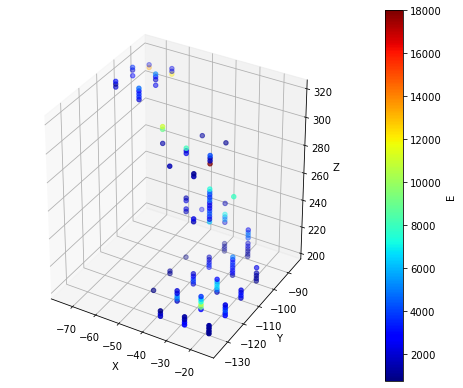

In [16]:
df_hits_esm_high_event = df_hits_esm_high.loc[df_hits_esm_high['event'] == nevent]

plot_3d_hits(df_hits_esm_high_event, value = 'E', coords = ['X', 'Y', 'Z'])

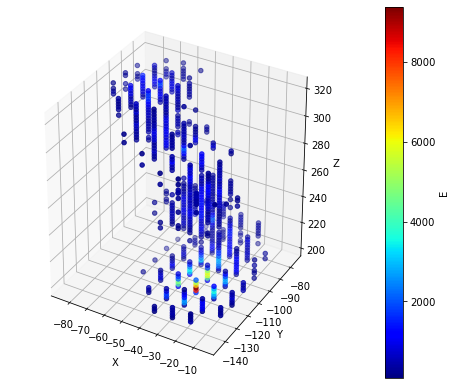

In [17]:
df_hits_esm_low_event = df_hits_esm_low.loc[df_hits_esm_low['event'] == nevent]

plot_3d_hits(df_hits_esm_low_event, value = 'E', coords = ['X', 'Y', 'Z'])

Ploteo low y high juntos...

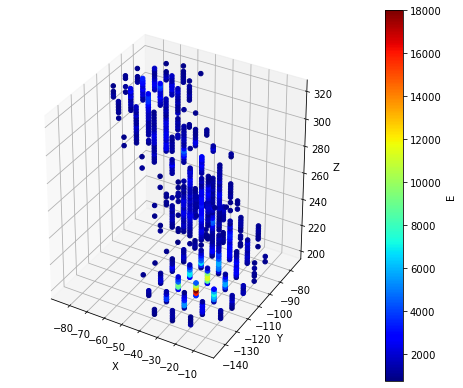

In [18]:
plot_3d_hits_double(df_hits_esm_high_event, df_hits_esm_low_event, value = 'E', coords = ['X', 'Y', 'Z'], opacity = 1)

Veamos ahora qué salió de correr beersheba...

In [19]:
dir_bersh = '/Users/mperez/NEXT/bersh_prod/prod_example/beersheba_example.h5'

In [20]:
with tb.open_file(dir_bersh) as h5in:
    print(h5in)

/Users/mperez/NEXT/bersh_prod/prod_example/beersheba_example.h5 (File) ''
Last modif.: 'Sun Oct  3 14:41:51 2021'
Object Tree: 
/ (RootGroup) ''
/DECO (Group) ''
/DECO/Events (Table(2076860,), shuffle, zlib(4)) 'Deconvolved hits'
/DST (Group) ''
/DST/Events (Table(808,), shuffle, zlib(4)) 'KDST Events'
/MC (Group) ''
/MC/event_mapping (Table(545,), shuffle, zlib(4)) ''
/MC/generators (Table(0,), shuffle, zlib(4)) ''
/MC/hits (Table(136630,), shuffle, zlib(4)) ''
/MC/particles (Table(16461,), shuffle, zlib(4)) ''
/Run (Group) ''
/Run/events (Table(545,), shuffle, zlib(4)) 'event info table'
/Run/runInfo (Table(545,), shuffle, zlib(4)) 'run info table'
/Summary (Group) ''
/Summary/Events (Table(545,), shuffle, zlib(4)) 'Event summary information'



Vale, parece q no hizo absolutamente nada!! Quizás es por el hecho de que el input de beersheba son esmeraldas, como venía sospechando

In [21]:
df_hits_bersh = dio.load_dst(dir_bersh, 'DECO', 'Events')

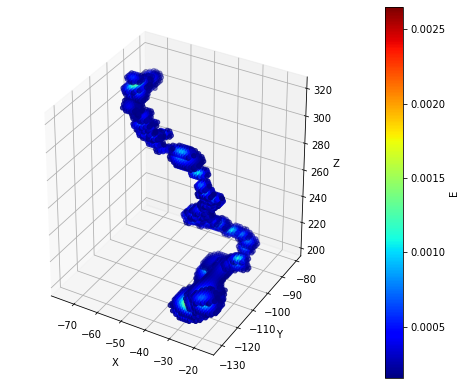

In [22]:
df_hits_bersh_event = df_hits_bersh.loc[df_hits_bersh['event'] == nevent]

plot_3d_hits(df_hits_bersh_event, value = 'E', coords = ['X', 'Y', 'Z'])

Los datos de MC con su beersheba por encima

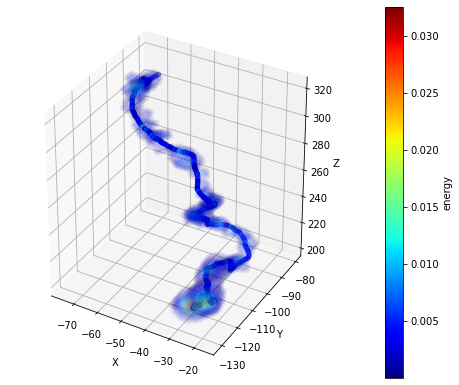

In [23]:
plot_3d_hits_double(df_hits_MC_event, df_hits_bersh_event, opacity = 0.05)

Se nota la diferencia con los penthesileas/esmeraldas la vd...